In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

In [37]:
train_data = pd.read_excel('train.xls', sheet_name=1)
print(train_data.info())
train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

AGREEMENT_RK  TARGET  AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  \
0          59910150       0   49                  1                  0   
1          59910230       0   32                  1                  0   
2          59910525       0   52                  1                  0   
3          59910803       0   39                  1                  0   
4          59911781       0   30                  1                  0   
...             ...     ...  ...                ...                ...   
15218      75291424       0   25                  1                  0   
15219      75291888       0   51                  1                  0   
15220      75291923       0   22                  1                  0   
15221      75291960       0   60                  0                  1   
15222      75292242       0   37                  1                  0   

       GENDER  CHILD_TOTAL  DEPENDANTS            EDUCATION  \
0           1            2           1  Среднее специальное   
1           1            3           3              Среднее   
2           1            4           0     Неполное среднее   
3           1            1           1               Высшее   
4           0            0           0              Среднее   
...       ...          ...         ...                  ...   
15218       0            1           1              Среднее   
15219       1            2           0  Среднее специальное   
15220       1            1           1              Среднее   
15221       1            2           0              Среднее   
15222       0            2           0              Среднее   

           MARITAL_STATUS  ... REG_PHONE_FL GEN_PHONE_FL LOAN_NUM_TOTAL  \
0          Состою в браке  ...            0            1              1   
1          Состою в браке  ...            0            1              1   
2          Состою в браке  ...            0            1              2   
3          Состою в браке  ...            1            1              1   
4          Состою в браке  ...            0            1              2   
...                   ...  ...          ...          ...            ...   
15218      Состою в браке  ...            0            1              3   
15219      Состою в браке  ...            0            1              1   
15220  Не состоял в браке  ...            0            1              1   
15221        Вдовец/Вдова  ...            0            0              1   
15222      Состою в браке  ...            0            1              1   

      LOAN_NUM_CLOSED LOAN_NUM_PAYM LOAN_DLQ_NUM  LOAN_MAX_DLQ  \
0                   1             6            2             1   
1                   1             6            1             1   
2                   1            11            0             0   
3                   1             6            3             1   
4                   1            16            2             1   
...               ...           ...          ...           ...   
15218               2            21            0             0   
15219               0             3            0             0   
15220               0             5            0             0   
15221               0             3            0             0   
15222               0             3            0             0   

      LOAN_AVG_DLQ_AMT LOAN_MAX_DLQ_AMT PREVIOUS_CARD_NUM_UTILIZED  
0          1580.000000           1580.0                        NaN  
1          4020.000000           4020.0                        NaN  
2             0.000000              0.0                        NaN  
3          1589.923333           1590.0                        NaN  
4          1152.150000           2230.0                        NaN  
...                ...              ...                        ...  
15218         0.000000              0.0                        NaN  
15219         0.000000              0.0                        NaN  
15220         0.000000              0.0       

In [38]:
test_data = pd.read_excel('test.xls', sheet_name=1)
print(train_data.info())
test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

AGREEMENT_RK  AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  GENDER  \
0          59909969   30                  1                  0       1   
1          59910420   48                  0                  1       1   
2          59911223   35                  1                  0       0   
3          59911322   22                  1                  0       0   
4          59911438   27                  1                  0       1   
...             ...  ...                ...                ...     ...   
14905      75291373   46                  1                  0       0   
14906      75291680   43                  1                  0       1   
14907      75291777   33                  1                  0       1   
14908      75292136   61                  0                  1       0   
14909      75292243   40                  1                  0       1   

       CHILD_TOTAL  DEPENDANTS            EDUCATION      MARITAL_STATUS  \
0                1           1  Среднее специальное  Не состоял в браке   
1                0           0              Среднее      Состою в браке   
2                1           0              Среднее  Не состоял в браке   
3                0           0              Среднее  Не состоял в браке   
4                2           2               Высшее      Состою в браке   
...            ...         ...                  ...                 ...   
14905            2           2              Среднее      Состою в браке   
14906            0           0  Среднее специальное      Состою в браке   
14907            0           0  Неоконченное высшее      Состою в браке   
14908            2           0     Неполное среднее        Вдовец/Вдова   
14909            2           2  Среднее специальное      Состою в браке   

                                    GEN_INDUSTRY  ... REG_PHONE_FL  \
0                                    Образование  ...            0   
1                                            NaN  ...            0   
2      Металлургия/Промышленность/Машиностроение  ...            0   
3                                   Другие сферы  ...            0   
4                                    Образование  ...            0   
...                                          ...  ...          ...   
14905                                  Транспорт  ...            0   
14906                                   Торговля  ...            0   
14907  Металлургия/Промышленность/Машиностроение  ...            0   
14908                                        NaN  ...            0   
14909                         Сельское хозяйство  ...            0   

      GEN_PHONE_FL LOAN_NUM_TOTAL LOAN_NUM_CLOSED LOAN_NUM_PAYM  LOAN_DLQ_NUM  \
0                1              2               2             8             0   
1                0              2               1            15             0   
2                1              1               1             1             0   
3                1              3               2             9             0   
4                1              1               1             5             0   
...            ...            ...             ...           ...           ...   
14905            1              2               0            62             0   
14906            1              1               0             4             0   
14907            1              1               0             3             0   
14908            0              1               0             3             0   
14909            1              1               0             4             1   

      LOAN_MAX_DLQ LOAN_AVG_DLQ_AMT LOAN_MAX_DLQ_AMT  \
0                0             0.00             0.00   
1                0             0.00             0.00   
2                0             0.00             0.00   
3                0             0.00             0.00   
4                0             0.00             0.00   
...            ...              ...              ...   
14905      

In [39]:
train_data.loc['PREVIOUS_CARD_NUM_UTILIZED'] = train_data['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
test_data['PREVIOUS_CARD_NUM_UTILIZED'] = test_data['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

train_data = train_data.dropna()
test_data = test_data.dropna()

In [42]:
# Разделение признаков и целевой переменной
X_train = train_data.drop('TARGET', axis=1)
y_train = train_data['TARGET']
X_test = test_data.copy()

# Предобработка данных
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Определение трансформеров
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение трансформеров
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание модели с предобработкой
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [43]:
# Обучение модели
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['AGREEMENT_RK', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'REG_FACT_FL',
       'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL',
       'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO'...
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
       'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [44]:
# Предсказание вероятностей для тестовой выборки
test_predictions = model.predict_proba(X_test)[:, 1]

In [45]:
from sklearn.model_selection import cross_val_score

# Оценка качества модели на обучающих данных
auc_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Mean AUC: {np.mean(auc_scores)}, Std AUC: {np.std(auc_scores)}")

Mean AUC: 0.48880062337879676, Std AUC: 0.07798079099151062


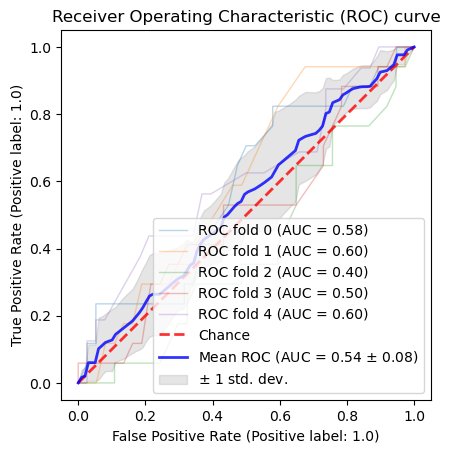

In [46]:
# Оценка качества модели на обучающих данных
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_fold_train, y_fold_train)
    viz = RocCurveDisplay.from_estimator(
        model,
        X_fold_test,
        y_fold_test,
        name=f"ROC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color='b',
    label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
    lw=2,
    alpha=.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver Operating Characteristic (ROC) curve"
)
ax.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Создание модели с предобработкой
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Параметры для поиска
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Поиск по сетке
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Оценка качества модели на обучающих данных
auc_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Mean AUC: {np.mean(auc_scores)}, Std AUC: {np.std(auc_scores)}")

Mean AUC: 0.4844008869550665, Std AUC: 0.07199632458759263
